In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
plt.rc('xtick', labelsize=18)     
plt.rc('ytick', labelsize=18)

df = pd.read_csv("./FiberDiamtersAndGaps.csv", delimiter=",");
df = df*10**(-9) #convert nm to m 
#display(df.head())
#print(df.columns)

for sample in df.columns:
    print(sample)
    stats = sci.stats.describe(df[sample].dropna().to_numpy())
    print(str(stats.mean) + ' +/- ' + str(np.sqrt(stats.variance)))
    print(str(stats.minmax))
    print('\n')

PVKinSU8_01_dia
2.1246145833333333e-06 +/- 1.6968860650776206e-07
(1.7549700000000002e-06, 2.45239e-06)


PVKinSU8_02_dia
2.278168888888889e-06 +/- 1.1775530495244979e-07
(2.04835e-06, 2.5258600000000004e-06)


PVKinSU8_06_dia
2.3768220000000004e-06 +/- 1.1788158981097784e-07
(2.1210200000000002e-06, 2.65158e-06)


PVKinSU8_05_dia
2.5036608695652176e-06 +/- 1.699400397895431e-07
(2.06744e-06, 2.8847100000000004e-06)


PVKinSU8_04_dia
3.1305462068965522e-06 +/- 1.090967724222658e-07
(2.9740100000000005e-06, 3.35945e-06)


PVKinSU8_10_gap
2.5563270440251577e-08 +/- 1.0696589927260407e-08
(4.76e-09, 5.470000000000001e-08)


PVKinCHL_07_dia
9.762267500000001e-07 +/- 1.0631238776283527e-07
(7.1929e-07, 1.2681600000000002e-06)


PVKinCHL_05_dia
2.1134744262295073e-06 +/- 1.7929298816485262e-07
(1.71206e-06, 2.5440100000000004e-06)


PVKinCHL_02_dia
2.47666e-06 +/- 1.3401777951276428e-07
(2.1607300000000003e-06, 2.86417e-06)


PVKinCHL_06_dia
2.8895425925925935e-06 +/- 1.9933052351426863e-07


<Figure size 432x288 with 0 Axes>

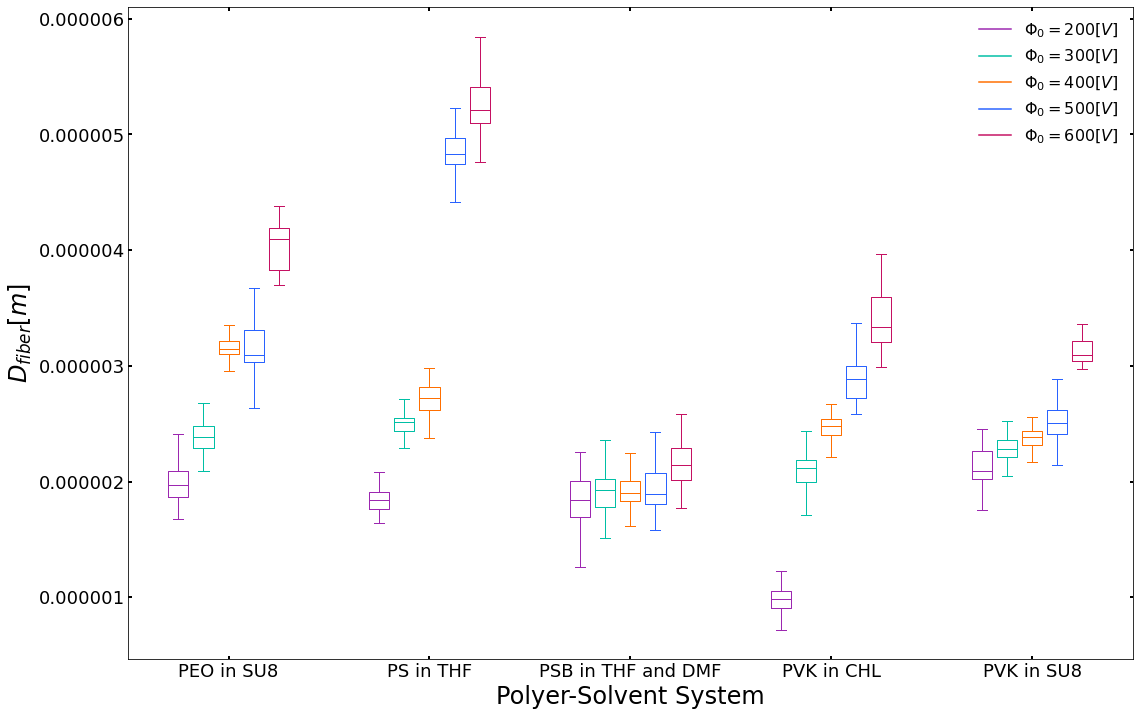

In [17]:
# https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots

# --- Your data, e.g. results per algorithm:
data_a = [
    df['PEOinSU8_00_dia'].dropna().to_numpy(),
    df['PSinTHF_07_dia'].dropna().to_numpy(),
    df['PSBinTHFDMF_06_dia'].dropna().to_numpy(),
    df['PVKinCHL_07_dia'].dropna().to_numpy(),
    df['PVKinSU8_01_dia'].dropna().to_numpy()
]
data_b = [
    df['PEOinSU8_05_dia'].dropna().to_numpy(),
    df['PSinTHF_05_dia'].dropna().to_numpy(),
    df['PSBinTHFDMF_00_dia'].dropna().to_numpy(),
    df['PVKinCHL_05_dia'].dropna().to_numpy(),
    df['PVKinSU8_02_dia'].dropna().to_numpy()
]
data_c = [
    df['PEOinSU8_04_dia'].dropna().to_numpy(),
    df['PSinTHF_06_dia'].dropna().to_numpy(),
    df['PSBinTHFDMF_02_dia'].dropna().to_numpy(),
    df['PVKinCHL_02_dia'].dropna().to_numpy(),
    df['PVKinSU8_06_dia'].dropna().to_numpy()
]
data_d = [
    df['PEOinSU8_02_dia'].dropna().to_numpy(),
    df['PSinTHF_03_dia'].dropna().to_numpy(),
    df['PSBinTHFDMF_03_dia'].dropna().to_numpy(),
    df['PVKinCHL_06_dia'].dropna().to_numpy(),
    df['PVKinSU8_05_dia'].dropna().to_numpy()
]
data_e = [
    df['PEOinSU8_06_dia'].dropna().to_numpy(),
    df['PSinTHF_04_dia'].dropna().to_numpy(),
    df['PSBinTHFDMF_04_dia'].dropna().to_numpy(),
    df['PVKinCHL_03_dia'].dropna().to_numpy(),
    df['PVKinSU8_04_dia'].dropna().to_numpy()
]

ticks = ['PEO in SU8', 'PS in THF', 'PSB in THF and DMF', 'PVK in CHL', 'PVK in SU8']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));
ax0 = plt.gca()

separation = 0.25 # separation between groups
bp_width   = 0.2  # separation between box plots
bpll = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-separation*2, sym='', widths=bp_width)
bpl  = plt.boxplot(data_b, positions=np.array(range(len(data_a)))*2.0-separation,   sym='', widths=bp_width)
bpc  = plt.boxplot(data_c, positions=np.array(range(len(data_b)))*2.0,              sym='', widths=bp_width)
bpr  = plt.boxplot(data_d, positions=np.array(range(len(data_b)))*2.0+separation,   sym='', widths=bp_width)
bprr = plt.boxplot(data_e, positions=np.array(range(len(data_b)))*2.0+separation*2, sym='', widths=bp_width)
set_box_color(bpll, '#9c27b0') # purple
set_box_color(bpl , '#00bfa5') # teal accent-4
set_box_color(bpc , '#ff6f00') # amber darken-4
set_box_color(bpr , '#2962ff') # blue accent-4
set_box_color(bprr, '#c51162') # pink accent-4

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#9c27b0', label=r'$\Phi_0 = 200 [V]$')
plt.plot([], c='#00bfa5', label=r'$\Phi_0 = 300 [V]$')
plt.plot([], c='#ff6f00', label=r'$\Phi_0 = 400 [V]$')
plt.plot([], c='#2962ff', label=r'$\Phi_0 = 500 [V]$')
plt.plot([], c='#c51162', label=r'$\Phi_0 = 600 [V]$')
plt.legend(prop={'size': 16}, frameon=False)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.ticklabel_format(axis='y', style='plain')

ax0.tick_params(
        which='both',
        direction='in',
        # length=5,
        width=2,
        bottom=True,
        top=True,
        left=True,
        right=True);

#plt.xlim(-2, len(ticks)*2)
#plt.ylim(0, 8)
#plt.tight_layout()
#plt.yscale('log');
plt.xlabel("Polyer-Solvent System", fontsize=24);
plt.ylabel(r'$D_{fiber} [m]$', fontsize=24);

plt.savefig('boxplotsFiberDiameter.png', dpi=200, bbox_inches='tight')  
plt.savefig('boxplotsFiberDiameter.pdf') # when publishing, use high quality PDFs
#plt.show()                        # uncomment to show the plot.

In [3]:
df['PVKinSU8_01_dia'].dropna().to_numpy()

array([2.11661e-06, 1.82755e-06, 1.75497e-06, 1.87561e-06, 1.92307e-06,
       2.09258e-06, 2.09134e-06, 2.16559e-06, 2.09258e-06, 2.04383e-06,
       2.12029e-06, 2.02437e-06, 2.01922e-06, 2.09148e-06, 2.21362e-06,
       1.87638e-06, 2.02151e-06, 2.06954e-06, 1.95244e-06, 1.97349e-06,
       1.90040e-06, 2.11552e-06, 2.01937e-06, 2.04326e-06, 1.94726e-06,
       2.09355e-06, 2.02051e-06, 2.11879e-06, 2.01937e-06, 2.02051e-06,
       2.04552e-06, 2.16359e-06, 2.38029e-06, 2.26012e-06, 2.18802e-06,
       2.26012e-06, 2.26076e-06, 2.37992e-06, 2.33185e-06, 2.45239e-06,
       2.42895e-06, 2.30969e-06, 2.33371e-06, 2.40384e-06, 2.38029e-06,
       2.30969e-06, 2.28415e-06, 2.16399e-06])

In [4]:
print(range(len([1, 2, 9, 8, 10, 4])))

range(0, 6)


In [5]:
np.array(range(len([1, 2, 9, 8, 10, 4])))

array([0, 1, 2, 3, 4, 5])

In [6]:
np.array(range(len([1, 2, 9, 8, 10, 4])))*3.0

array([ 0.,  3.,  6.,  9., 12., 15.])